In [412]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.cluster import KMeans


In [278]:
# Importing the libraries
import pandas as pd

In [414]:
# Import the data
# Show the top 5 records
df=pd.read_csv('fake loan website.csv')
pd.set_option('display.max_columns',None)
df.head()


,Website URL,Domain Age,SSL Certificate Status,Number of External Links,Presence on Blacklists,Loan Amount Requested,Interest Rate Offered,Repayment Period,Loan Type,Application Processing Time,Required Documents,Upfront Fees,Number of Reviews/Feedback,Customer Complaints Count,Social Media Mentions,Contact Methods Available,IP Address Location,Hosting Provider,Mismatch Between Domain and Company Name,Email Domain Validity,Grammar/Spelling Errors on Site,Unusual Loan Terms,User IP Address,Application Submission Time
0,http://stanford.edu/turpis/adipiscing/lorem/vi...,"1 Years, 9 Months",True,2,True,"$1,467.64",6,5/6/2025,payday,4:29 PM,ID,$80.58,183,23,238,476-417-5364,Gominhães,Bluezoom,False,False,False,True,42.125.14.23,6/8/2024
1,https://ebay.co.uk/ipsum/primis/in/faucibus/or...,"1 Years, 9 Months",True,2,False,"$1,658.29",9,1/1/2025,business,12:52 PM,Proof of Income,$96.36,210,83,661,516-233-6908,Almenara,Oozz,True,True,True,False,13.28.41.221,17/05/2024
2,https://dailymotion.com/ut/rhoncus/aliquet/pul...,"1 Years, 9 Months",True,3,True,"$1,153.24",5,14/09/2025,business,1:45 PM,Tax Returns,$90.37,194,96,637,613-276-8407,Hezhi,Mynte,True,True,True,False,103.112.126.207,1/8/2024
3,http://paginegialle.it/potenti.xml?porta=tellu...,"1 Years, 5 Months",False,3,False,"$1,511.19",0,20/10/2025,personal,8:53 AM,Bank Statements,$82.84,502,31,694,638-677-1457,Hafrsfjord,Oloo,True,False,False,True,146.104.89.9,21/05/2024
4,http://github.com/sed/justo/pellentesque/viver...,"1 Years, 1 Months",True,1,False,$179.89,4,30/11/2024,personal,11:41 AM,Proof of Income,$88.16,493,79,36,420-743-0928,Singa,Roomm,False,True,True,False,111.237.234.53,16/12/2023


In [180]:
# EDA-Exploratory data Analysis
# Shape of the dataset
df.shape

(500, 24)

In [416]:
# Data Information
# Check data types, null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Website URL                               500 non-null    object
 1   Domain Age                                500 non-null    object
 2   SSL Certificate Status                    500 non-null    bool  
 3   Number of External Links                  500 non-null    int64 
 4   Presence on Blacklists                    500 non-null    bool  
 5   Loan Amount Requested                     500 non-null    object
 6   Interest Rate Offered                     500 non-null    int64 
 7   Repayment Period                          500 non-null    object
 8   Loan Type                                 500 non-null    object
 9   Application Processing Time               500 non-null    object
 10  Required Documents                        500 non-

In [418]:
# Data Description
# Check statastics of dataset
df.describe()

,Number of External Links,Interest Rate Offered,Number of Reviews/Feedback,Customer Complaints Count,Social Media Mentions
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.490000,4.888000,497.560000,51.492000,487.396000
std,1.685105,3.209994,294.254212,29.612628,277.206468
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,231.750000,26.750000,266.500000
50%,2.000000,5.000000,493.000000,53.000000,479.000000
75%,4.000000,8.000000,768.250000,78.000000,704.750000
max,5.000000,10.000000,1000.000000,100.000000,997.000000


In [420]:
# Data check performance
# Check missing values
df.isna().sum()

Website URL                                 0
Domain Age                                  0
SSL Certificate Status                      0
Number of External Links                    0
Presence on Blacklists                      0
Loan Amount Requested                       0
Interest Rate Offered                       0
Repayment Period                            0
Loan Type                                   0
Application Processing Time                 0
Required Documents                          0
Upfront Fees                                0
Number of Reviews/Feedback                  0
Customer Complaints Count                   0
Social Media Mentions                       0
Contact Methods Available                   0
IP Address Location                         0
Hosting Provider                            0
Mismatch Between Domain and Company Name    0
Email Domain Validity                       0
Grammar/Spelling Errors on Site             0
Unusual Loan Terms                

In [422]:
# Check duplicates
df.duplicated().sum()

0

In [288]:
# Check the number of unique values in each column 
df.nunique()

Website URL                                 500
Domain Age                                   62
SSL Certificate Status                        2
Number of External Links                      6
Presence on Blacklists                        2
Loan Amount Requested                       498
Interest Rate Offered                        11
Repayment Period                            267
Loan Type                                     3
Application Processing Time                 343
Required Documents                            4
Upfront Fees                                435
Number of Reviews/Feedback                  397
Customer Complaints Count                    99
Social Media Mentions                       385
Contact Methods Available                   500
IP Address Location                         494
Hosting Provider                            276
Mismatch Between Domain and Company Name      2
Email Domain Validity                         2
Grammar/Spelling Errors on Site         

In [424]:
# Exploring data
df.head(1)

,Website URL,Domain Age,SSL Certificate Status,Number of External Links,Presence on Blacklists,Loan Amount Requested,Interest Rate Offered,Repayment Period,Loan Type,Application Processing Time,Required Documents,Upfront Fees,Number of Reviews/Feedback,Customer Complaints Count,Social Media Mentions,Contact Methods Available,IP Address Location,Hosting Provider,Mismatch Between Domain and Company Name,Email Domain Validity,Grammar/Spelling Errors on Site,Unusual Loan Terms,User IP Address,Application Submission Time
0,http://stanford.edu/turpis/adipiscing/lorem/vi...,"1 Years, 9 Months",True,2,True,"$1,467.64",6,5/6/2025,payday,4:29 PM,ID,$80.58,183,23,238,476-417-5364,Gominhães,Bluezoom,False,False,False,True,42.125.14.23,6/8/2024


In [426]:
# Shows the unique values from the dataset
print("Categories in 'Website URL' variable:  ",end=" ")
print(df['Website URL'].unique())
print("Categories in 'Domain Age' variable:  ",end=" ")
print(df['Domain Age'].unique())
print("Categories in 'SSL Certificate Status' variable:  ",end=" ")
print(df['SSL Certificate Status'].unique())
print("Categories in 'Number of External Links' variable:  ",end=" ")
print(df['Number of External Links'].unique())
print("Categories in 'Presence on Blacklists' variable:  ",end=" ")
print(df['Presence on Blacklists'].unique())
print("Categories in 'Loan Amount Requested' variable:  ",end=" ")
print(df['Loan Amount Requested'].unique())
print("Categories in 'Interest Rate Offered' variable:  ",end=" ")
print(df['Interest Rate Offered'].unique())
print("Categories in 'Repayment Period' variable:  ",end=" ")
print(df['Repayment Period'].unique())
print("Categories in 'Loan Type' variable:  ",end=" ")
print(df['Loan Type'].unique())
print("Categories in 'Application Processing Time' variable:  ",end=" ")
print(df['Application Processing Time'].unique())
print("Categories in 'Social Media Mentions' variable:  ",end=" ")
print(df['Social Media Mentions'].unique())
print("Categories in 'Contact Methods Available' variable:  ",end=" ")
print(df['Contact Methods Available'].unique())
print("Categories in 'IP Address Location' variable:  ",end=" ")
print(df['IP Address Location'].unique())
print("Categories in 'Hosting Provider' variable:  ",end=" ")
print(df['Hosting Provider'].unique())
print("Categories in 'Mismatch Between Domain and Company Name' variable:  ",end=" ")
print(df['Mismatch Between Domain and Company Name'].unique())
print("Categories in 'Email Domain Validity' variable:  ",end=" ")
print(df['Email Domain Validity'].unique())
print("Categories in 'Grammar/Spelling Errors on Site' variable:  ",end=" ")
print(df['Grammar/Spelling Errors on Site'].unique())
print("Categories in 'Unusual Loan Terms' variable:  ",end=" ")
print(df['Unusual Loan Terms'].unique())
print("Categories in 'User IP Address' variable:  ",end=" ")
print(df['User IP Address'].unique())
print("Categories in 'Application Submission Time' variable:  ",end=" ")
print(df['Application Submission Time'].unique())

Categories in 'Website URL' variable:   ['http://stanford.edu/turpis/adipiscing/lorem/vitae/mattis/nibh/ligula.png?sit=duis&amet=ac&sem=nibh&fusce=fusce&consequat=lacus&nulla=purus&nisl=aliquet&nunc=at&nisl=feugiat&duis=non&bibendum=pretium&felis=quis&sed=lectus&interdum=suspendisse&venenatis=potenti&turpis=in&enim=eleifend&blandit=quam&mi=a&in=odio&porttitor=in&pede=hac&justo=habitasse&eu=platea&massa=dictumst&donec=maecenas&dapibus=ut&duis=massa&at=quis&velit=augue&eu=luctus&est=tincidunt&congue=nulla&elementum=mollis&in=molestie&hac=lorem&habitasse=quisque&platea=ut&dictumst=erat&morbi=curabitur&vestibulum=gravida&velit=nisi&id=at&pretium=nibh&iaculis=in&diam=hac&erat=habitasse&fermentum=platea&justo=dictumst&nec=aliquam&condimentum=augue&neque=quam&sapien=sollicitudin&placerat=vitae&ante=consectetuer&nulla=eget&justo=rutrum&aliquam=at&quis=lorem&turpis=integer&eget=tincidunt&elit=ante&sodales=vel&scelerisque=ipsum&mauris=praesent&sit=blandit&amet=lacinia&eros=erat&suspendisse=vesti

In [428]:
# Define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 11 numerical features : ['SSL Certificate Status', 'Number of External Links', 'Presence on Blacklists', 'Interest Rate Offered', 'Number of Reviews/Feedback', 'Customer Complaints Count', 'Social Media Mentions', 'Mismatch Between Domain and Company Name', 'Email Domain Validity', 'Grammar/Spelling Errors on Site', 'Unusual Loan Terms']

We have 13 categorical features : ['Website URL', 'Domain Age', 'Loan Amount Requested', 'Repayment Period', 'Loan Type', 'Application Processing Time', 'Required Documents', 'Upfront Fees', 'Contact Methods Available', 'IP Address Location', 'Hosting Provider', 'User IP Address', 'Application Submission Time']


In [430]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,r2_score

In [468]:
# Apply Label Encoding to all the attributes
categorical_columns=['Website URL','Domain Age','SSL Certificate Status','Number of External Links','Presence on Blacklists','Loan Amount Requested','Interest Rate Offered','Repayment Period','Loan Type','Application Processing Time','Required Documents','Upfront Fees','Number of Reviews/Feedback','Customer Complaints Count','Social Media Mentions','Contact Methods Available','IP Address Location','Hosting Provider','Mismatch Between Domain and Company Name','Email Domain Validity','Grammar/Spelling Errors on Site','Unusual Loan Terms','User IP Address','Application Submission Time']
le=LabelEncoder()
for column in categorical_columns:
    df[f'{column}']=le.fit_transform(df[column])
    print(df[[f'{column}']].head())


   Website URL
0          188
1          314
2          304
3          141
4           68
   Domain Age
0          19
1          19
2          19
3          15
4           9
   SSL Certificate Status
0                       1
1                       1
2                       1
3                       0
4                       1
   Number of External Links
0                         2
1                         2
2                         3
3                         3
4                         1
   Presence on Blacklists
0                       1
1                       0
2                       1
3                       0
4                       0
   Loan Amount Requested
0                    135
1                    187
2                     38
3                    144
4                    289
   Interest Rate Offered
0                      6
1                      9
2                      5
3                      0
4                      4
   Repayment Period
0               230
1     

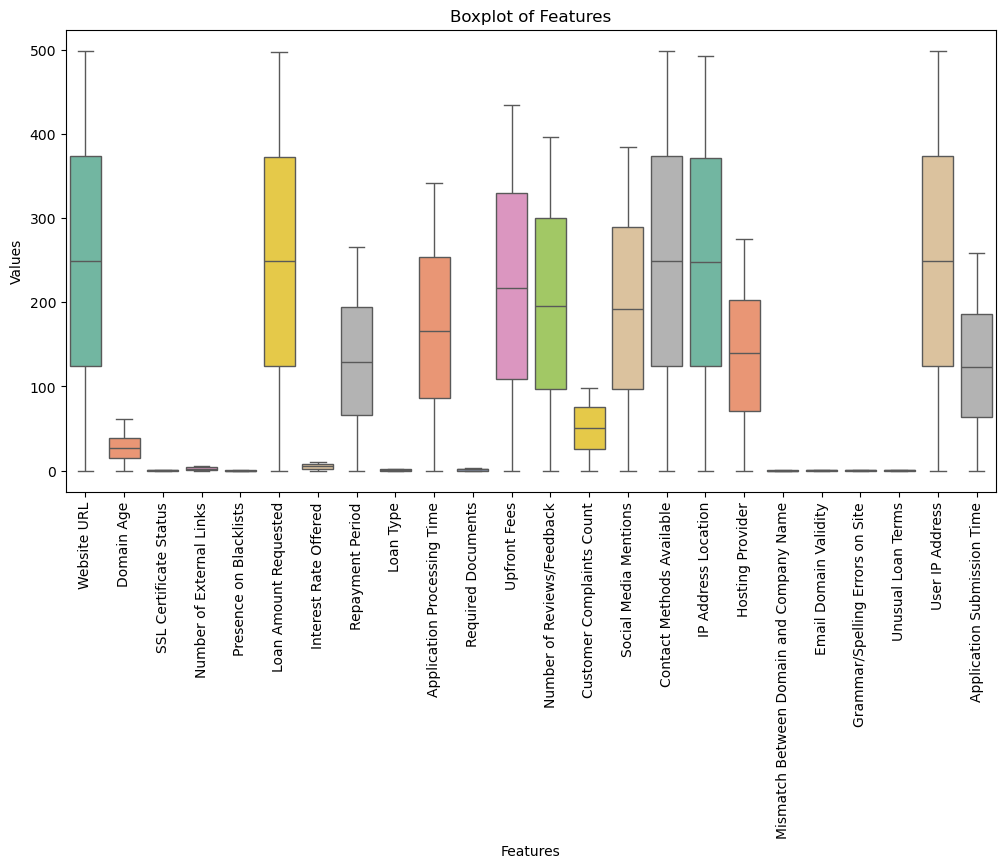

In [298]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,palette='Set2')
plt.title('Boxplot of Features')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Features')
plt.show()

In [29]:
df.head(1)

,Website URL,Domain Age,SSL Certificate Status,Number of External Links,Presence on Blacklists,Loan Amount Requested,Interest Rate Offered,Repayment Period,Loan Type,Application Processing Time,Required Documents,Upfront Fees,Number of Reviews/Feedback,Customer Complaints Count,Social Media Mentions,Contact Methods Available,IP Address Location,Hosting Provider,Mismatch Between Domain and Company Name,Email Domain Validity,Grammar/Spelling Errors on Site,Unusual Loan Terms,User IP Address,Application Submission Time
0,188,19,1,2,1,135,6,230,1,220,1,14,77,22,84,226,132,14,0,0,0,1,368,239


<Figure size 600x400 with 0 Axes>

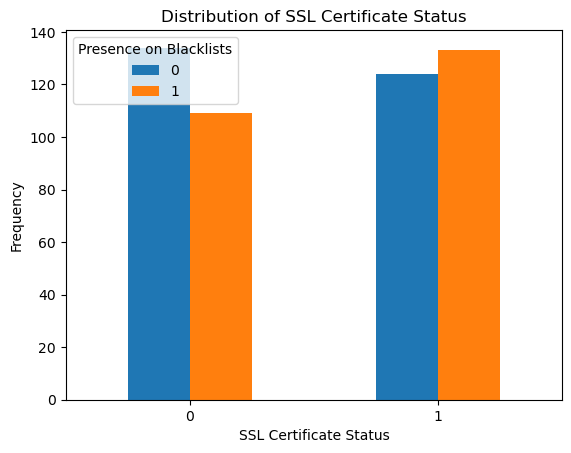

<Figure size 600x400 with 0 Axes>

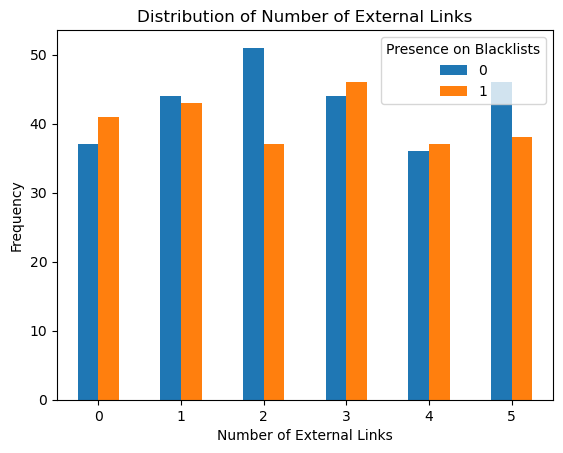

<Figure size 600x400 with 0 Axes>

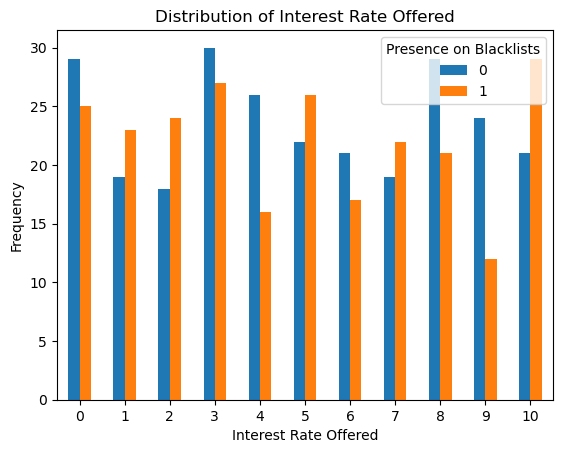

<Figure size 600x400 with 0 Axes>

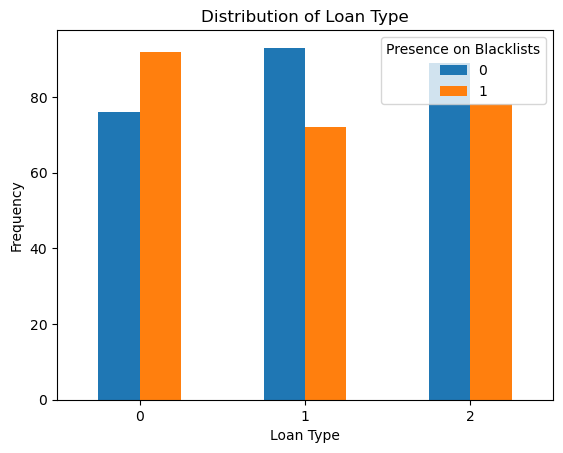

<Figure size 600x400 with 0 Axes>

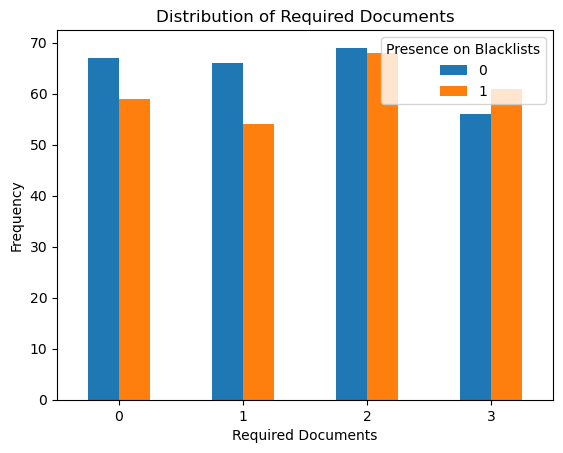

<Figure size 600x400 with 0 Axes>

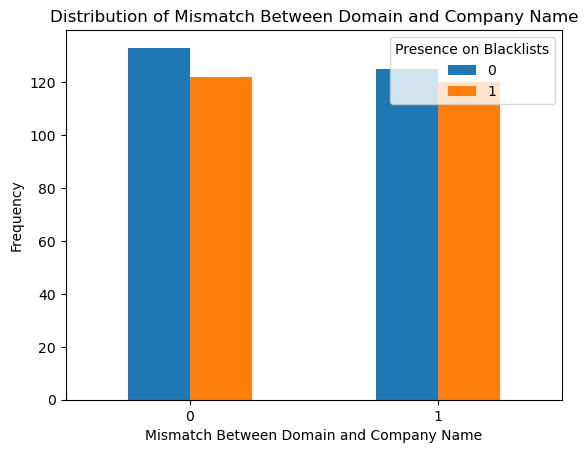

<Figure size 600x400 with 0 Axes>

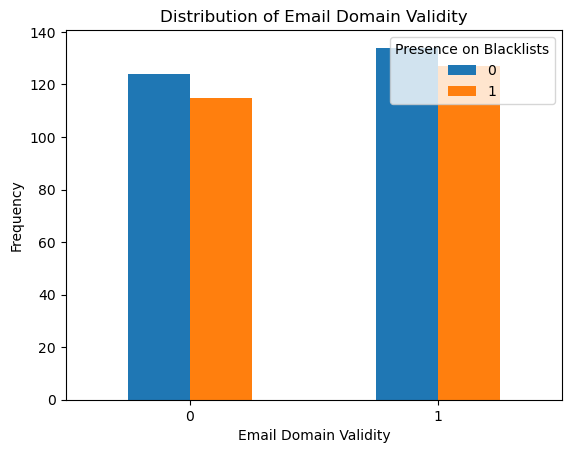

<Figure size 600x400 with 0 Axes>

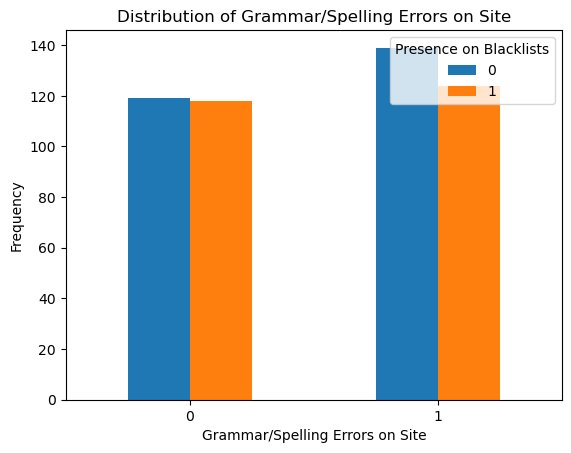

<Figure size 600x400 with 0 Axes>

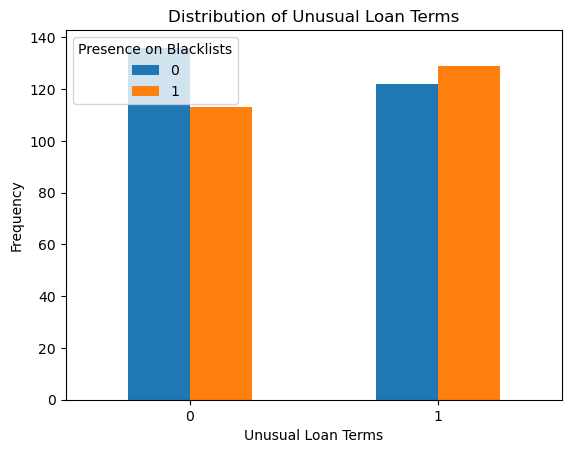

<Figure size 400x200 with 0 Axes>

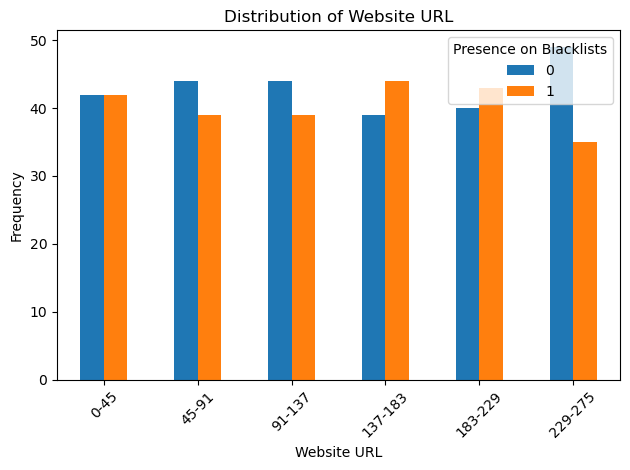

<Figure size 400x200 with 0 Axes>

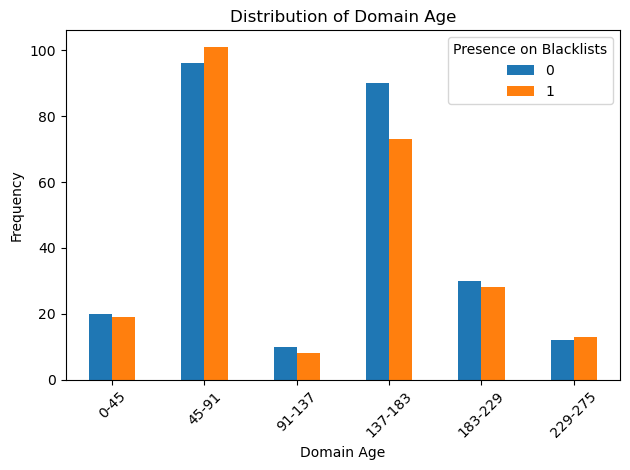

<Figure size 400x200 with 0 Axes>

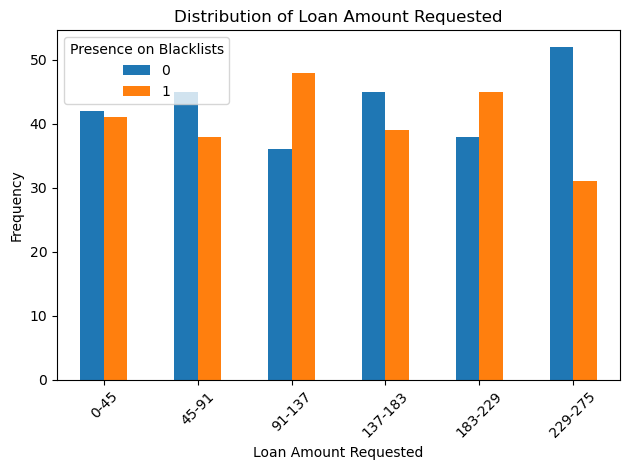

<Figure size 400x200 with 0 Axes>

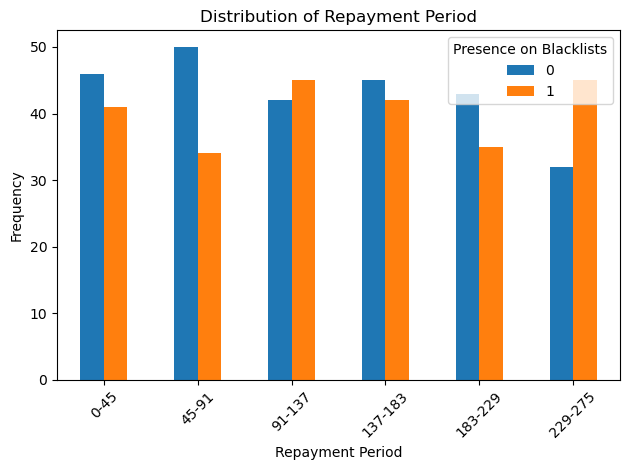

<Figure size 400x200 with 0 Axes>

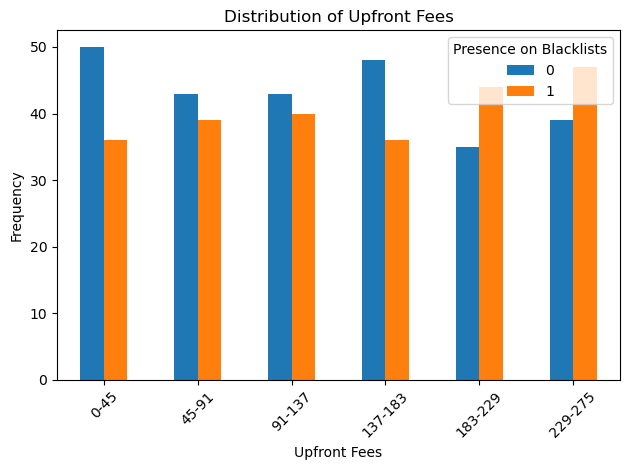

<Figure size 400x200 with 0 Axes>

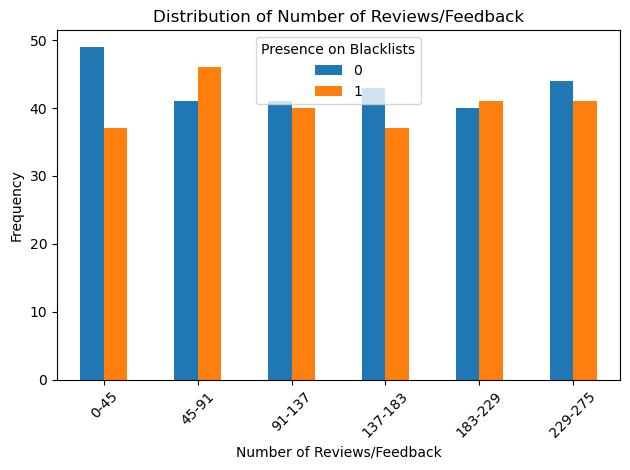

<Figure size 400x200 with 0 Axes>

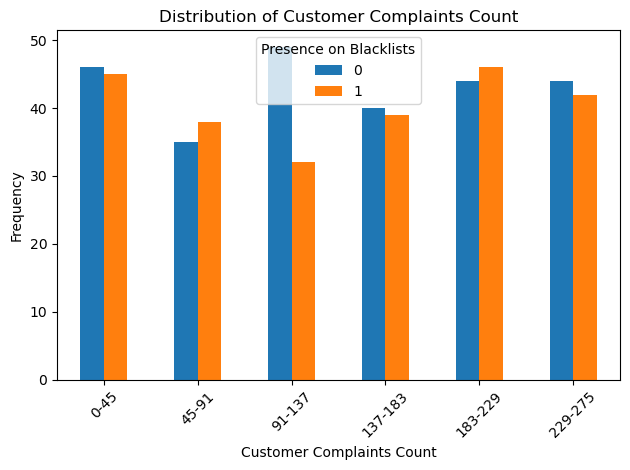

<Figure size 400x200 with 0 Axes>

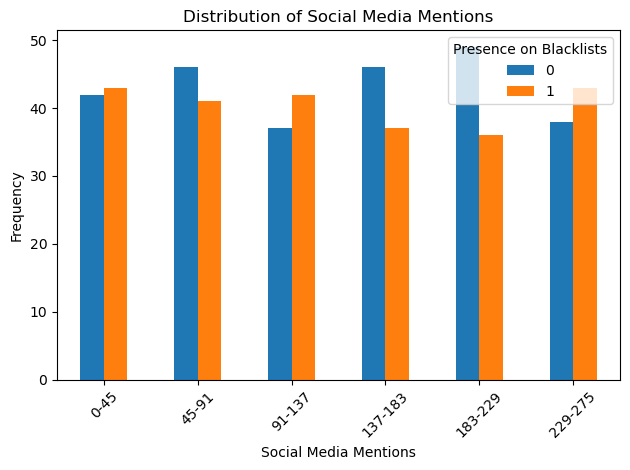

<Figure size 400x200 with 0 Axes>

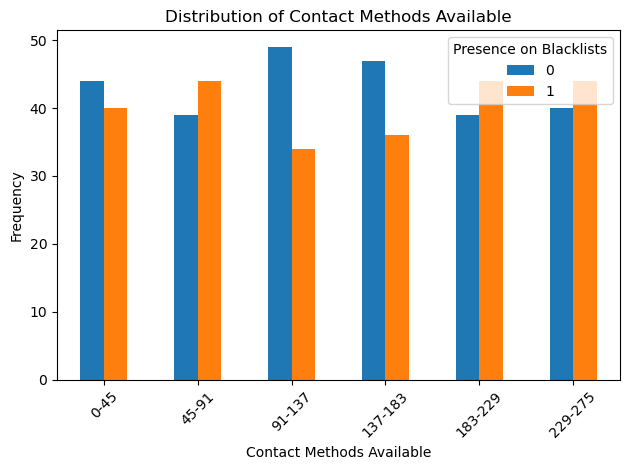

<Figure size 400x200 with 0 Axes>

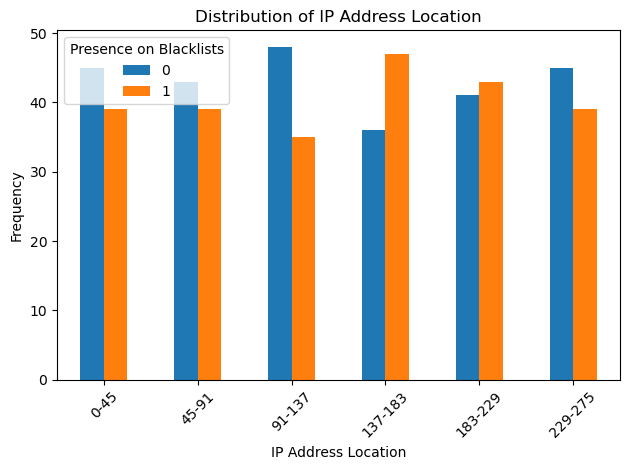

<Figure size 400x200 with 0 Axes>

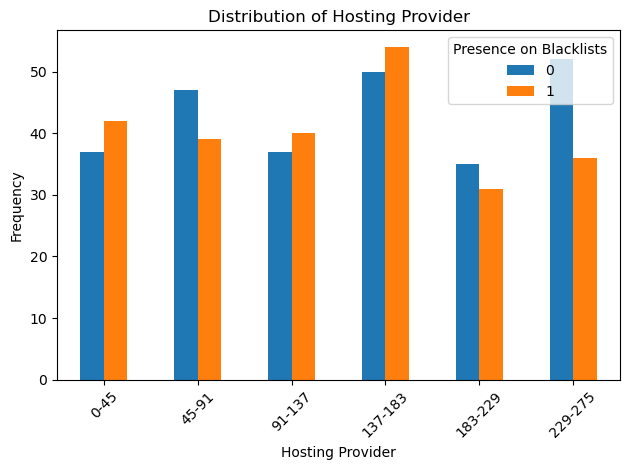

In [300]:
# Feature Correlation Analysis
x=df[['SSL Certificate Status','Number of External Links','Interest Rate Offered','Loan Type','Required Documents','Mismatch Between Domain and Company Name','Email Domain Validity','Grammar/Spelling Errors on Site','Unusual Loan Terms']]
y=df['Presence on Blacklists']
for column in x.columns:
  plt.figure(figsize=(6,4))
  pd.crosstab(x[column],y).plot(kind='bar')
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.xticks(rotation=0)
  plt.show()



features_to_bin =['Website URL','Domain Age', 'Loan Amount Requested','Repayment Period', 'Upfront Fees','Number of Reviews/Feedback','Customer Complaints Count','Social Media Mentions','Contact Methods Available',	'IP Address Location','Hosting Provider']
target = 'Presence on Blacklists'
bins = 6                 # Can also be a specific range like [0, 5, 10, 15, 20] for fixed binning
binned_data = df.copy()   # Create a copy to avoid modifying the original data
for feature in features_to_bin:
    binned_data[f'{feature}_Binned'], bin_edges = pd.cut(binned_data[feature], bins=bins, retbins=True, labels=False)
    
    # Generate labels for the bins
    bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i + 1])}" for i in range(len(bin_edges) - 1)]
    
for feature in features_to_bin:
    plt.figure(figsize=(4, 2))
    cross_tab = pd.crosstab(binned_data[f'{feature}_Binned'], y)
    cross_tab.plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45)
    plt.tight_layout()
    plt.show()


In [308]:
df.head(1)

,Website URL,Domain Age,SSL Certificate Status,Number of External Links,Presence on Blacklists,Loan Amount Requested,Interest Rate Offered,Repayment Period,Loan Type,Application Processing Time,Required Documents,Upfront Fees,Number of Reviews/Feedback,Customer Complaints Count,Social Media Mentions,Contact Methods Available,IP Address Location,Hosting Provider,Mismatch Between Domain and Company Name,Email Domain Validity,Grammar/Spelling Errors on Site,Unusual Loan Terms,User IP Address,Application Submission Time
0,188,19,1,2,1,135,6,230,1,220,1,14,77,22,84,226,132,14,0,0,0,1,368,239


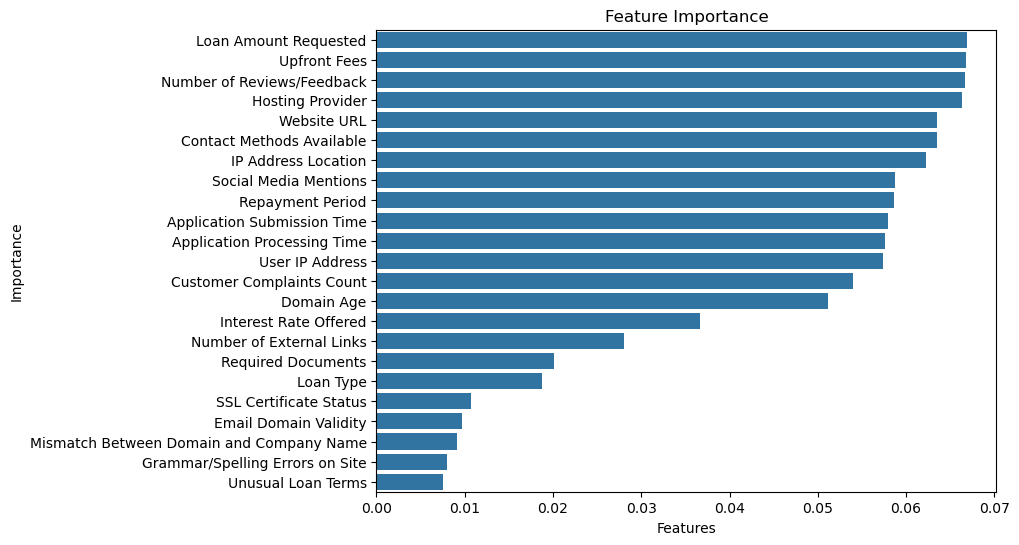

In [318]:
from sklearn.ensemble import RandomForestClassifier
x=df.drop(columns=['Presence on Blacklists'])
y=df['Presence on Blacklists']
rf_model = RandomForestClassifier()
rf_model.fit(x,y)
feature_importance = pd.DataFrame(rf_model.feature_importances_,index=x.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y=feature_importance.index,x=feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,r2_score

In [324]:
# Classification of Logistic Regression
# Standardization
x=df.select_dtypes(include=['float64', 'int64']).drop(columns=['SSL Certificate Status','Number of External Links','Presence on Blacklists','Number of Reviews/Feedback',])
y=df['Grammar/Spelling Errors on Site']
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Mean Square Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-Squared Score: ", r2_score(y_test, y_pred))

Confusion Matrix: 
 [[55  0]
 [ 0 45]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy Score:  1.0
Mean Square Error: 0.0
Mean Absolute Error: 0.0
R-Squared Score:  1.0


In [15]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

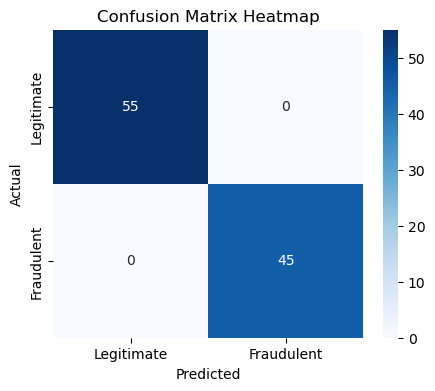

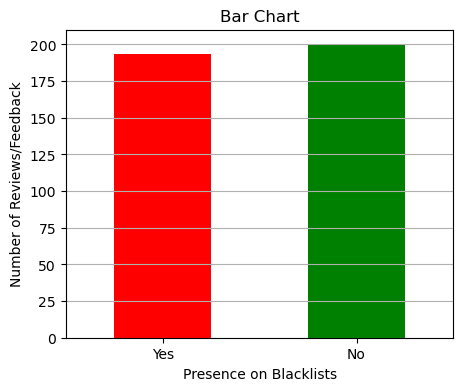

In [43]:
# Confusion Matrix Heatmap Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Bar Chart
x = df['Presence on Blacklists']
y = df['Number of Reviews/Feedback']
grouped_data = df.groupby('Presence on Blacklists')['Number of Reviews/Feedback'].mean()

grouped_data.plot(kind='bar', color=['red', 'green'],figsize=(5, 4))
plt.xlabel('Presence on Blacklists')
plt.ylabel('Number of Reviews/Feedback')
plt.xticks([0, 1], labels=['Yes', 'No'], rotation=0)
plt.title('Bar Chart')
plt.grid(axis='y')
plt.show()

In [476]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Loan Amount Requested','Upfront Fees','Number of Reviews/Feedback'])
y = df['Presence on Blacklists']  


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[43  0]
 [ 0 57]]

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



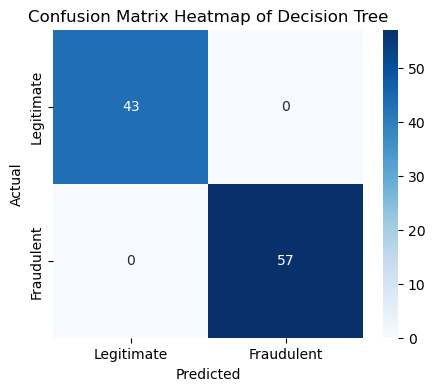

In [490]:
# visualization of Decision Tree
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap of Decision Tree')
plt.show()

In [ ]:
# K-Means clustering visualization
# Importing the libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

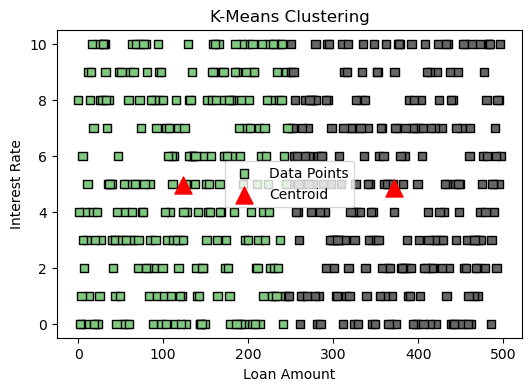

In [472]:
# 
x=df[['Loan Amount Requested', 'Interest Rate Offered' ]].values
Kmeans=KMeans(n_clusters=2, random_state=0)
Kmeans.fit(x)
clusters=Kmeans.fit_predict(x)
centroid=Kmeans.cluster_centers_
plt.figure(figsize=(6,4))
plt.scatter(x[:,0],x[:,1],c=clusters, cmap='Accent_r',edgecolor='k',label='Data Points',marker='s')
plt.scatter(centroid[:,0],centroid[:,1],c='red',label='Centroid',marker='^',s=150)
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('K-Means Clustering')
plt.legend()
plt.show()